# Importar librerias necesarias!

In [26]:
import os
import PIL
import PIL.Image
import numpy as np

In [27]:
!pip install -U insightface -q
!pip install onnxruntime -q
from insightface.app import FaceAnalysis

# Dataset prueba

In [28]:
# dataset_prueba
!wget "https://www.dropbox.com/scl/fi/b9y03enpi01zfb36ckyir/personas.zip?rlkey=19wypqmaps5b5n28bz3gi7xg7&st=s6p3564g&dl=0" -O personas.zip

--2025-10-06 02:58:22--  https://www.dropbox.com/scl/fi/b9y03enpi01zfb36ckyir/personas.zip?rlkey=19wypqmaps5b5n28bz3gi7xg7&st=s6p3564g&dl=0
Resolviendo www.dropbox.com (www.dropbox.com)... 2620:100:601d:18::a27d:512, 162.125.5.18
Conectando con www.dropbox.com (www.dropbox.com)[2620:100:601d:18::a27d:512]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Localización: https://ucb0d1b13c893971c125119713c1.dl.dropboxusercontent.com/cd/0/inline/Cytr8Y1c6F9jMKmpFAGGGe8b8ucN0fsJ-40O-PD2SuQlDzlI4oQCfLZCcJhJf7WvAL959aX78ut9Ex-ChaPQpT1cWPw-IzWu9LGH_BJMsdDnZ7IFVONgOECn1CnP-Xzl0dqedSCkiD4Vo6f4-I_DVthJ/file# [siguiendo]
--2025-10-06 02:58:23--  https://ucb0d1b13c893971c125119713c1.dl.dropboxusercontent.com/cd/0/inline/Cytr8Y1c6F9jMKmpFAGGGe8b8ucN0fsJ-40O-PD2SuQlDzlI4oQCfLZCcJhJf7WvAL959aX78ut9Ex-ChaPQpT1cWPw-IzWu9LGH_BJMsdDnZ7IFVONgOECn1CnP-Xzl0dqedSCkiD4Vo6f4-I_DVthJ/file
Resolviendo ucb0d1b13c893971c125119713c1.dl.dropboxusercontent.com (ucb0d1b13c893971c125119713c1.dl.d

In [29]:
!unzip personas.zip

Archive:  personas.zip
replace personas/barack/face_2.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [450]:
# leemos la lista de personalidades del dataset junto a un número reducido de fotos
datapath = 'personas'
ffaces = os.path.join(datapath, 'faces.txt')
fdata = []
dnames = {}
with open(ffaces) as f:
  for line in f :
    ipath, icl = line.split()
    ipath = os.path.join(datapath, ipath)
    fdata.append({'path': ipath, 'name': icl, 'emb': []})
    if icl not in dnames:
        dnames[icl] = len(dnames)
print(dnames)
print(fdata)

{'paulina': 0, 'dicaprio': 1, 'barack': 2, 'pancho': 3, 'thalia': 4, 'mario': 5, 'michelle': 6}
[{'path': 'personas/paulina/paulina2.png', 'name': 'paulina', 'emb': []}, {'path': 'personas/paulina/paulina1.jpeg', 'name': 'paulina', 'emb': []}, {'path': 'personas/dicaprio/dicaprio_2.png', 'name': 'dicaprio', 'emb': []}, {'path': 'personas/dicaprio/dicaprio.jpg', 'name': 'dicaprio', 'emb': []}, {'path': 'personas/barack/barack.jpeg', 'name': 'barack', 'emb': []}, {'path': 'personas/barack/barack_2.jpeg', 'name': 'barack', 'emb': []}, {'path': 'personas/barack/face_2.jpeg', 'name': 'barack', 'emb': []}, {'path': 'personas/pancho/pancho.jpeg', 'name': 'pancho', 'emb': []}, {'path': 'personas/pancho/pancho2.jpeg', 'name': 'pancho', 'emb': []}, {'path': 'personas/thalia/thalia1.jpg', 'name': 'thalia', 'emb': []}, {'path': 'personas/thalia/thalia2.jpg', 'name': 'thalia', 'emb': []}, {'path': 'personas/mario/mario1.png', 'name': 'mario', 'emb': []}, {'path': 'personas/mario/mario2.png', 'name'

In [451]:
print(fdata)


[{'path': 'personas/paulina/paulina2.png', 'name': 'paulina', 'emb': []}, {'path': 'personas/paulina/paulina1.jpeg', 'name': 'paulina', 'emb': []}, {'path': 'personas/dicaprio/dicaprio_2.png', 'name': 'dicaprio', 'emb': []}, {'path': 'personas/dicaprio/dicaprio.jpg', 'name': 'dicaprio', 'emb': []}, {'path': 'personas/barack/barack.jpeg', 'name': 'barack', 'emb': []}, {'path': 'personas/barack/barack_2.jpeg', 'name': 'barack', 'emb': []}, {'path': 'personas/barack/face_2.jpeg', 'name': 'barack', 'emb': []}, {'path': 'personas/pancho/pancho.jpeg', 'name': 'pancho', 'emb': []}, {'path': 'personas/pancho/pancho2.jpeg', 'name': 'pancho', 'emb': []}, {'path': 'personas/thalia/thalia1.jpg', 'name': 'thalia', 'emb': []}, {'path': 'personas/thalia/thalia2.jpg', 'name': 'thalia', 'emb': []}, {'path': 'personas/mario/mario1.png', 'name': 'mario', 'emb': []}, {'path': 'personas/mario/mario2.png', 'name': 'mario', 'emb': []}, {'path': 'personas/michelle/michelle_obama_1.jpeg', 'name': 'michelle', '

# Modelo y Embbedings

## ModelZoo InsightFace

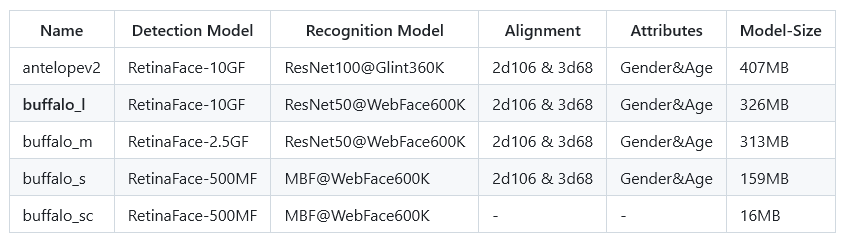![](
)

In [452]:
# Iniciamos el modelo de FaceRecognition
# BUFFALO_L -> https://github.com/deepinsight/insightface/tree/master/model_zoo

app = FaceAnalysis(name='buffalo_l', providers=['CUDAExecutionProvider'])  # Use 'CUDAExecutionProvider' for GPU
app.prepare(ctx_id=-1)  # ctx_id=-1 for CPU, 0 for GPU

/home/mbustamc/Documentos/diplomados/dia_2025/cc66t_reconocimiento-visual/cc66t_laboratorios/.venv/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:123: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/mbustamc/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/mbustamc/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/mbustamc/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/mbustamc/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/mbustamc/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [453]:
# Get embeddings, con esto pasaremos una imagen por el modelo y guardaremos su embedding.
def get_face_embedding(image_path):
    """Extract face embedding from an image"""
    img = PIL.Image.open(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")
    img = np.array(img)
    if img.shape[2] == 4:
      img = img[:,:,:-1]

    faces = app.get(img)
    if len(faces) < 1:
        raise ValueError("No faces detected in the image")
    if len(faces) > 1:
        print("Warning: Multiple faces detected. Using first detected face")

    # Retornar el embedding del primer rostro encontrado
    return faces[0].embedding

In [454]:
# Guardar el embedding para cada rostro en nuestra fdata.
compute = True
for person in fdata :
    print(person['path'])
    emb = get_face_embedding(person['path'])
    person['emb'] = emb

for i in range(len(fdata)):
    print(i, fdata[i]['path'], fdata[i]['emb'].shape)

personas/paulina/paulina2.png
personas/paulina/paulina1.jpeg
personas/dicaprio/dicaprio_2.png
personas/dicaprio/dicaprio.jpg
personas/barack/barack.jpeg
personas/barack/barack_2.jpeg
personas/barack/face_2.jpeg
personas/pancho/pancho.jpeg
personas/pancho/pancho2.jpeg
personas/thalia/thalia1.jpg
personas/thalia/thalia2.jpg
personas/mario/mario1.png
personas/mario/mario2.png
personas/michelle/michelle_obama_1.jpeg
personas/michelle/michelle_obama_2.jpg
0 personas/paulina/paulina2.png (512,)
1 personas/paulina/paulina1.jpeg (512,)
2 personas/dicaprio/dicaprio_2.png (512,)
3 personas/dicaprio/dicaprio.jpg (512,)
4 personas/barack/barack.jpeg (512,)
5 personas/barack/barack_2.jpeg (512,)
6 personas/barack/face_2.jpeg (512,)
7 personas/pancho/pancho.jpeg (512,)
8 personas/pancho/pancho2.jpeg (512,)
9 personas/thalia/thalia1.jpg (512,)
10 personas/thalia/thalia2.jpg (512,)
11 personas/mario/mario1.png (512,)
12 personas/mario/mario2.png (512,)
13 personas/michelle/michelle_obama_1.jpeg (512,)

In [455]:
print(fdata)

[{'path': 'personas/paulina/paulina2.png', 'name': 'paulina', 'emb': array([-1.14265546e-01, -1.05881763e+00,  5.88553905e-01, -1.10149038e+00,
        2.28365040e+00,  1.48630011e+00,  4.54847395e-01,  2.18558908e-01,
       -3.43301117e-01, -4.11670506e-01,  1.21416986e+00, -3.17530543e-01,
        4.95496660e-01, -1.34613454e-01,  4.13063139e-01, -1.26554918e+00,
       -2.13639665e+00,  7.08058476e-01,  2.27156878e-02, -3.92799109e-01,
        1.84956059e-01, -1.59472454e+00,  9.93286908e-01,  4.10958230e-01,
       -8.87074620e-02,  1.49143195e+00, -2.60809183e-01,  8.44307959e-01,
        1.00114298e+00, -1.78383958e+00,  6.90111518e-01,  1.36535883e-01,
        1.82030901e-01, -1.11316919e+00,  3.20333809e-01, -3.00474465e-04,
        4.03422773e-01,  2.50832605e+00,  3.09862942e-01,  3.11894529e-02,
        7.45211899e-01, -9.59180236e-01,  5.04101992e-01, -1.23452079e+00,
       -1.57055092e+00,  2.34042183e-01, -6.02753043e-01, -1.27724695e+00,
       -8.81775618e-01,  5.5575

# Comparación "todos contra todos"

In [456]:
# Crear una matriz de los embeddings que ya tenemos
# N Filas (personas) por 512 de la dimension del embedding. (persona por embedding)

embs = []
idnames = []
n = len(fdata)
dim = len(fdata[0]['emb'])
embs = np.zeros((n, dim), dtype = np.float32)

for i, person in enumerate(fdata):
  # print(i, person)
  embs[i, :] = person['emb']
  idnames.append(dnames[person['name']])

In [457]:
print(embs.shape)

(15, 512)


In [458]:
idnames

[0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]

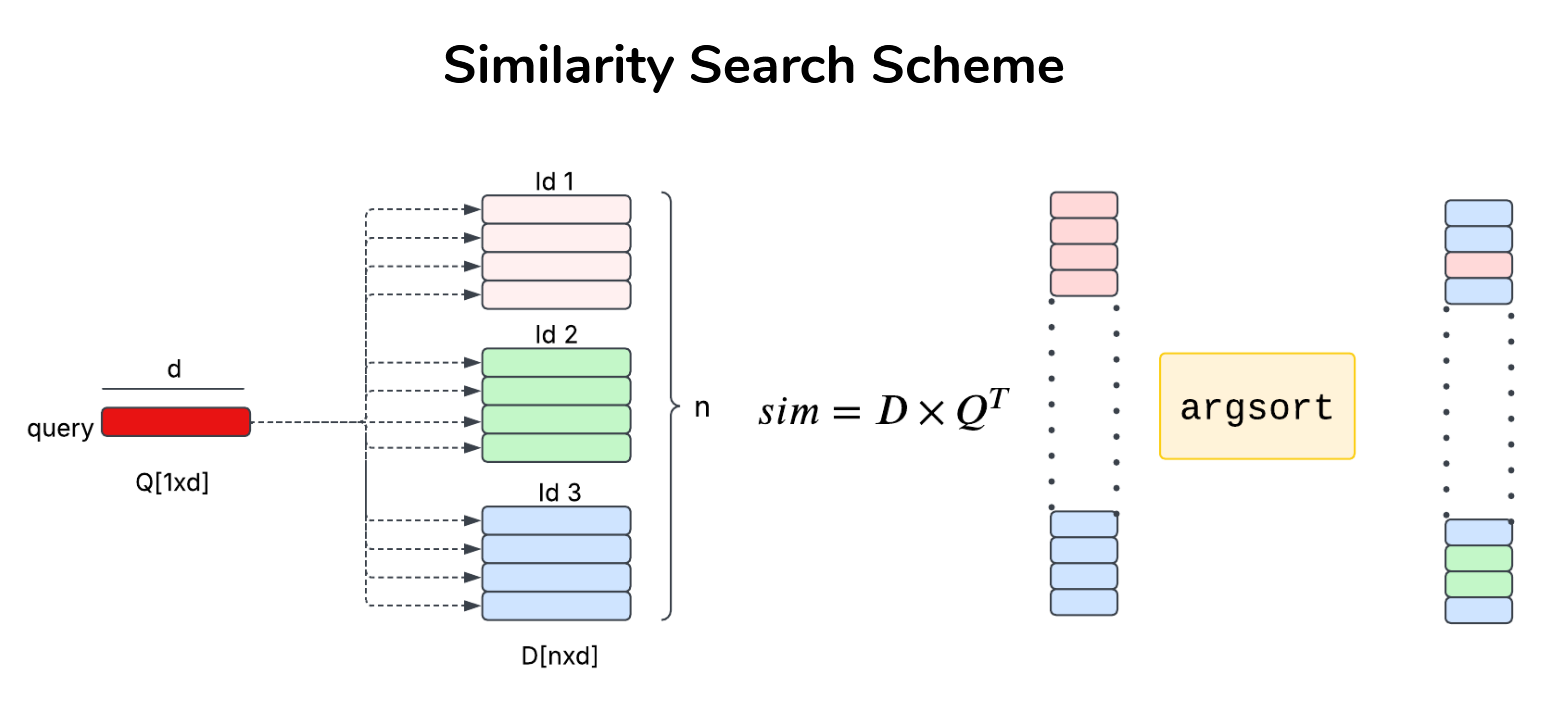

In [459]:
# Similarity Search -- Aplicamos producto punto todos contra todos

# normalizar los embedding ->   embedding / L2 norm (norma Euclideana)
embs_norm = embs / np.linalg.norm(embs, ord = 2, axis = 1,  keepdims = True)
# (It scales each embedding vector so that its length (magnitude) becomes 1)

sim = embs_norm @ np.transpose(embs_norm)


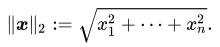

In [460]:
print(sim)

[[ 1.0000000e+00  6.2091148e-01  1.4419974e-01  1.1881724e-01
  -4.3928705e-02 -4.2916708e-02 -4.6245165e-02  1.0602462e-01
   6.0486905e-02 -9.2999907e-03  1.1417773e-01  4.8244365e-02
   1.9483801e-02  1.1305122e-01  1.2899187e-01]
 [ 6.2091148e-01  1.0000000e+00  1.5393433e-01  9.2735447e-02
  -8.4229112e-02 -4.6397049e-02 -1.9339167e-02  1.1954491e-01
   7.1693614e-02  2.9089380e-02  1.3622121e-02  2.8045475e-04
  -1.1759914e-02  3.0222097e-03 -4.5506060e-03]
 [ 1.4419974e-01  1.5393433e-01  1.0000001e+00  8.2802188e-01
   8.7306745e-02  6.2302578e-02  1.0194063e-01  1.7433237e-02
  -4.6713978e-02 -5.9806012e-02 -7.4942425e-02  4.4832777e-02
   1.9818639e-02  1.1826560e-01  1.4005813e-01]
 [ 1.1881724e-01  9.2735447e-02  8.2802188e-01  1.0000000e+00
   1.2986918e-01  3.9691798e-02  1.3073254e-01  1.6856942e-02
  -5.3042419e-02 -8.2204491e-02 -7.5398922e-02  3.7840158e-02
   6.8672374e-04  3.6277410e-02  6.2857181e-02]
 [-4.3928705e-02 -8.4229112e-02  8.7306745e-02  1.2986918e-01
  

In [461]:
print(np.diag(sim))

[1.         1.         1.0000001  1.         1.0000004  1.
 0.9999997  0.9999998  1.         0.9999999  0.99999976 0.99999976
 0.99999976 0.9999997  0.9999999 ]


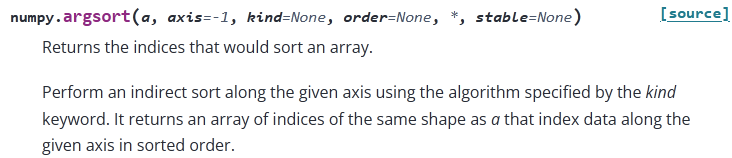

In [462]:
# Ordenamos por fila, de mayor a  menor similitud
# np.argsort() ordena en forma ascendente, por lo tanto, el de mayor similud quedaria al fondo.
#   debemos ordenar el "negativo" de la matriz, para poder darla vuelto.

idx_sort =  np.argsort(-sim, axis = 1)
print(idx_sort)


[[ 0  1  2 14  3 10 13  7  8 11 12  9  5  4  6]
 [ 1  0  2  7  3  8  9 10 13 11 14 12  6  5  4]
 [ 2  3  1  0 14 13  6  4  5 11 12  7  8  9 10]
 [ 3  2  6  4  0  1 14  5 11 13  7 12  8 10  9]
 [ 4  6  5  3  2  7  9 10  8 11 12 13  0 14  1]
 [ 5  6  4  2 14  3 13  9 10 11  7 12  8  0  1]
 [ 6  5  4  3  2 13  9 11 10 12 14  7  1  0  8]
 [ 7  8  1  0  4 13  2  3  9  6  5 11 14 10 12]
 [ 8  7  1  0  4  9 14 10 13 11  5  2  3  6 12]
 [ 9 10 14 13  4  6  5  1  8  7  0 11 12  2  3]
 [10  9  0 14  4  6 13  5  1  8 11 12  7  2  3]
 [11 12  0  2  6  3  4  1  5  7 13 10  8  9 14]
 [12 11  6  2  0  4  3  1  5  9 13 10  7 14  8]
 [13 14  2  0  9  6 10  3  5  7  1 11  8  4 12]
 [14 13  2  9  0 10  3  5  6  1  8  4  7 11 12]]


In [463]:
# Mostramos los nombres de los más similares para cada imagen
for idx, row in enumerate(idx_sort) :
    name_query = fdata[idx]['name']
    print('Query Name = {}'.format(name_query))
    result = [(fdata[i]['name'], sim[idx, i]) for i in row[1:5] ]
    print(result)


Query Name = paulina
[('paulina', np.float32(0.6209115)), ('dicaprio', np.float32(0.14419974)), ('michelle', np.float32(0.12899187)), ('dicaprio', np.float32(0.11881724))]
Query Name = paulina
[('paulina', np.float32(0.6209115)), ('dicaprio', np.float32(0.15393433)), ('pancho', np.float32(0.11954491)), ('dicaprio', np.float32(0.09273545))]
Query Name = dicaprio
[('dicaprio', np.float32(0.8280219)), ('paulina', np.float32(0.15393433)), ('paulina', np.float32(0.14419974)), ('michelle', np.float32(0.14005813))]
Query Name = dicaprio
[('dicaprio', np.float32(0.8280219)), ('barack', np.float32(0.13073254)), ('barack', np.float32(0.12986918)), ('paulina', np.float32(0.11881724))]
Query Name = barack
[('barack', np.float32(0.70025647)), ('barack', np.float32(0.69845605)), ('dicaprio', np.float32(0.12986918)), ('dicaprio', np.float32(0.087306745))]
Query Name = barack
[('barack', np.float32(0.7008226)), ('barack', np.float32(0.69845605)), ('dicaprio', np.float32(0.06230258)), ('michelle', np.f

# Visualización del espacio

In [464]:
# Visualizar el espacio

import umap.umap_ as umap
import matplotlib
import matplotlib.pyplot as plt

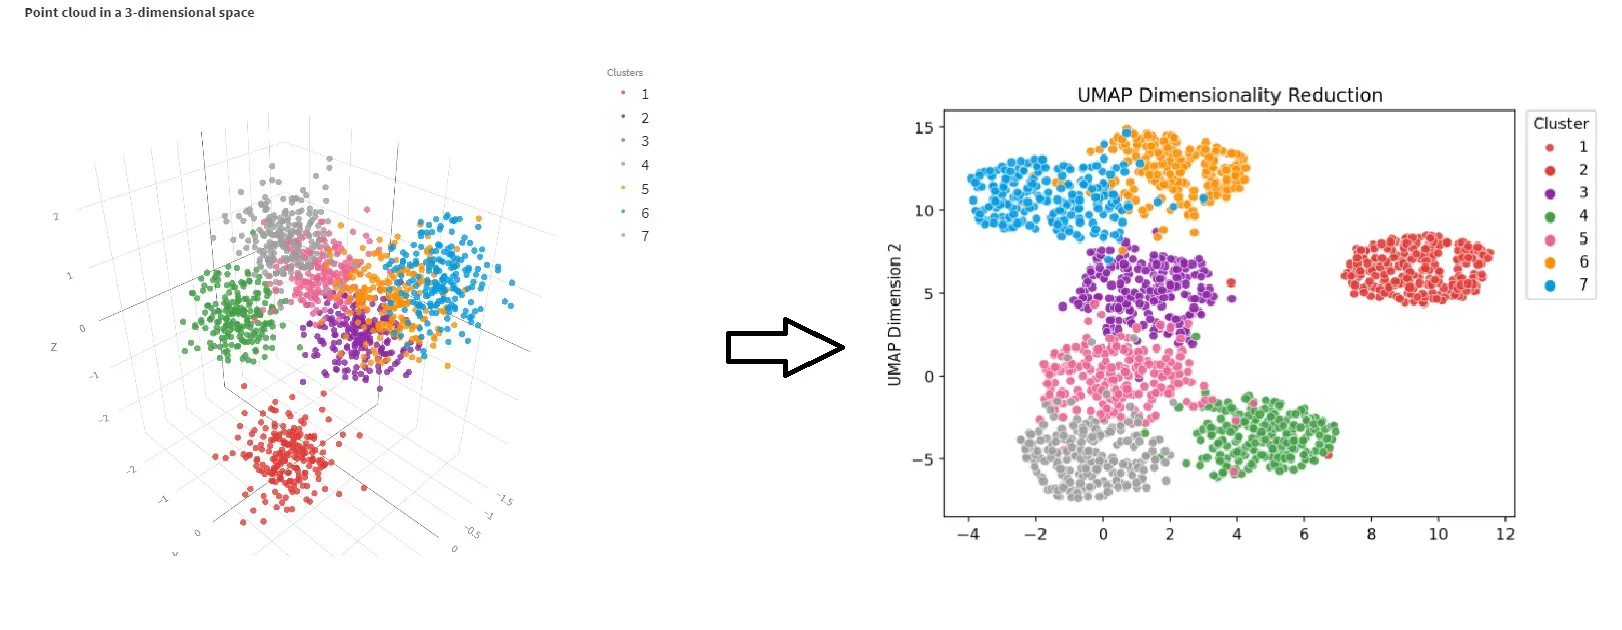

In [465]:
reducer = umap.UMAP(n_neighbors=2)
embeddings = reducer.fit_transform(embs)


/home/mbustamc/Documentos/diplomados/dia_2025/cc66t_reconocimiento-visual/cc66t_laboratorios/.venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [466]:
embeddings

array([[22.484272 ,  3.7085688],
       [22.215303 ,  3.977549 ],
       [-3.571403 , 24.163195 ],
       [-3.815179 , 24.406307 ],
       [21.407738 , -6.5234094],
       [20.80256  , -5.9192367],
       [21.03412  , -6.151068 ],
       [ 2.858429 , -4.8674808],
       [ 2.946433 , -4.955497 ],
       [-2.3309317, 16.336979 ],
       [-2.4980497, 16.17106  ],
       [ 2.594745 , 24.278582 ],
       [ 2.3620946, 24.482508 ],
       [ 7.6367316, 11.437513 ],
       [ 7.7447915, 11.329439 ]], dtype=float32)

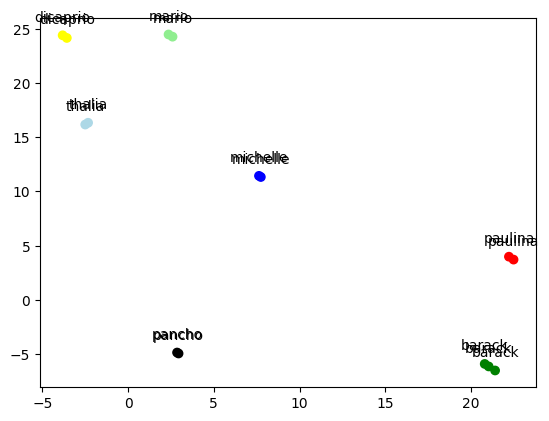

In [467]:
colors = ['red', 'yellow', 'green', 'black', 'lightblue', 'lightgreen', 'blue']
plt.scatter(embeddings[:, 0], embeddings[:, 1], c = idnames, cmap=matplotlib.colors.ListedColormap(colors))

unique_names = list(dnames.keys())
for i, txt in enumerate(idnames):
    plt.annotate(unique_names[txt], (embeddings[i, 0], embeddings[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

# Comparacion de nueva imagen!

Name: mario, Similarity: 0.0983
Name: mario, Similarity: 0.0906
Name: pancho, Similarity: 0.0677
Name: thalia, Similarity: 0.0569
Name: pancho, Similarity: 0.0507
Name: thalia, Similarity: 0.0388
Name: paulina, Similarity: 0.0282
Name: barack, Similarity: 0.0235
Name: barack, Similarity: 0.0076
Name: barack, Similarity: 0.0004
Name: paulina, Similarity: -0.0038
Name: dicaprio, Similarity: -0.0189
Name: dicaprio, Similarity: -0.0296
Name: michelle, Similarity: -0.0473
Name: michelle, Similarity: -0.0489
[-8.88222158e-02 -3.71937491e-02  2.68687215e-02 -3.80965658e-02
  2.81786527e-02 -6.34696484e-02 -9.30133928e-03 -6.08645752e-02
 -6.80006109e-03  2.80550383e-02  1.68983750e-02  6.83358088e-02
 -5.76600945e-03  5.05717956e-02  2.70923153e-02  2.80036181e-02
  2.73101963e-02 -2.67846393e-03 -9.10671204e-02 -1.31275635e-02
  5.26442267e-02  2.89631188e-02  7.77228852e-04 -3.55558433e-02
  3.82853090e-03 -4.30558063e-02  5.65972961e-02  2.42743036e-03
 -4.87885550e-02 -2.01079641e-02  2.7

ValueError: 'c' argument has 17 elements, which is inconsistent with 'x' and 'y' with size 16.

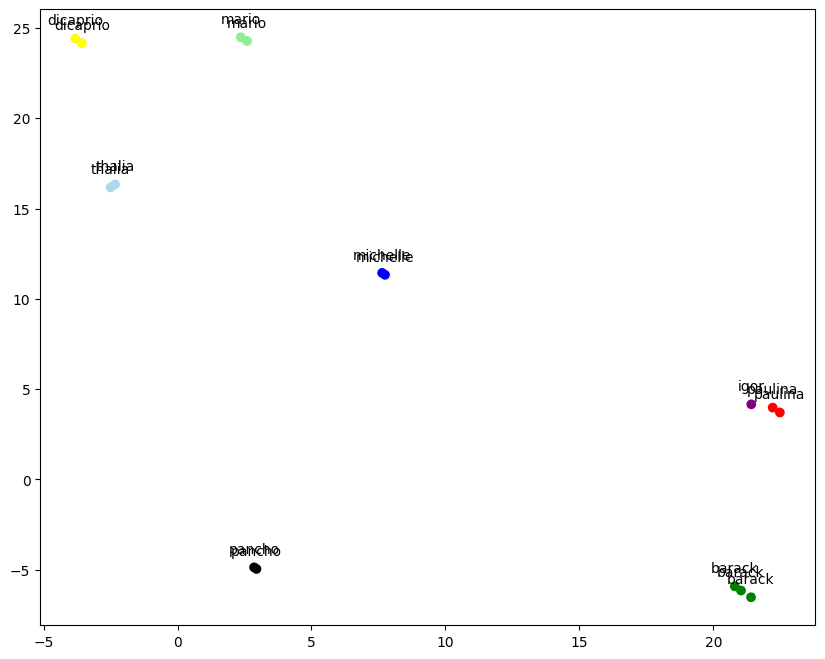

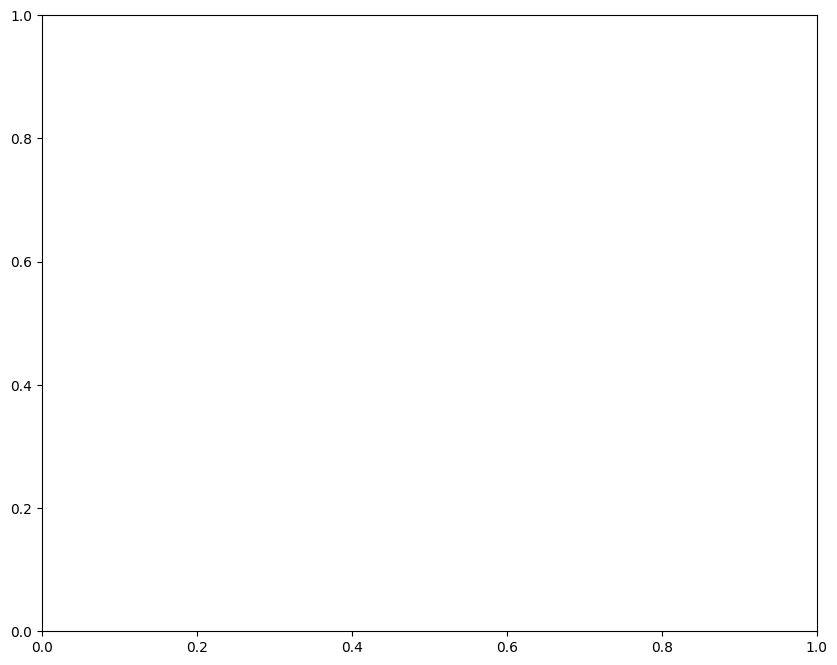

In [ ]:
def new_data(filename='familiares_01.txt', datapath=datapath, dnames=dnames, fdata=fdata):

    new_faces = os.path.join(datapath, filename)
    with open(new_faces) as file:
        for line in file:
            ipath, icl = line.split()
            ipath = os.path.join(datapath, ipath)
            
            emb = get_face_embedding(ipath)
            fdata.append({'path': ipath, 'name': icl, 'emb': emb})
            if icl not in dnames:
                dnames[icl] = len(dnames)
            
            idnames.append(dnames[icl])
            #embs[i, :] = emb
            

            emb_norm = emb / np.linalg.norm(emb, ord=2)
            similarity_score = emb_norm @ np.transpose(embs_norm)
            idx_sort = np.argsort(-similarity_score)

            for i in idx_sort:
                person_name = fdata[i]['name']
                similarity = similarity_score[i]
                print("Name: {}, Similarity: {:.4f}".format(person_name, similarity))
            print(emb_norm)
            print(similarity_score)


            print(embs.shape)# calcular reductor
            emb_reducer = reducer.transform(emb_norm.reshape(1, -1))
            all_embeddings_reducer = np.vstack((embeddings, emb_reducer))


            plt.figure(figsize=(10, 8))
            colors = ['red', 'yellow', 'green', 'black', 'lightblue', 'lightgreen', 'blue', 'purple']
            plt.scatter(all_embeddings_reducer[:, 0], all_embeddings_reducer[:, 1], c = idnames, cmap=matplotlib.colors.ListedColormap(colors))

            unique_names = list(dnames.keys())
            for i, txt in enumerate(idnames):
                plt.annotate(unique_names[txt], (all_embeddings_reducer[i, 0], all_embeddings_reducer[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

            plt.show()

    return dnames, fdata, embs

dnames, fdata, embs = new_data('familiares_02.txt')
print(dnames)
print(idnames)


(15, 512)


In [ ]:
def new_embeddings(dnames, fdata=fdata):
    n = len(fdata)
    dim = len(fdata[0]['emb'])
    embs = np.zeros((n, dim), dtype = np.float32)

    '''for i, person in enumerate(fdata):
        embs[i, :] = person['emb']
        idnames.append(dnames[person['name']])
    '''
    

    print(idnames)
    print(len(idnames))
    print(fdata)
    
    return embs, idnames


embs_familia_01, idnames_familia_01 = new_embeddings(dnames, fdata)



[0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 8, 9]
21
[{'path': 'personas/paulina/paulina2.png', 'name': 'paulina', 'emb': array([-1.14265546e-01, -1.05881763e+00,  5.88553905e-01, -1.10149038e+00,
        2.28365040e+00,  1.48630011e+00,  4.54847395e-01,  2.18558908e-01,
       -3.43301117e-01, -4.11670506e-01,  1.21416986e+00, -3.17530543e-01,
        4.95496660e-01, -1.34613454e-01,  4.13063139e-01, -1.26554918e+00,
       -2.13639665e+00,  7.08058476e-01,  2.27156878e-02, -3.92799109e-01,
        1.84956059e-01, -1.59472454e+00,  9.93286908e-01,  4.10958230e-01,
       -8.87074620e-02,  1.49143195e+00, -2.60809183e-01,  8.44307959e-01,
        1.00114298e+00, -1.78383958e+00,  6.90111518e-01,  1.36535883e-01,
        1.82030901e-01, -1.11316919e+00,  3.20333809e-01, -3.00474465e-04,
        4.03422773e-01,  2.50832605e+00,  3.09862942e-01,  3.11894529e-02,
        7.45211899e-01, -9.59180236e-01,  5.04101992e-01, -1.23452079e+00,
       -1.57055092e+00,  2.34042183e-01

In [ ]:

def new_similarity(embs_new, idnames_new):

    

    embs_new_norm = embs_new / np.linalg.norm(embs_new, ord = 2, axis = 1,  keepdims = True)
    similarity_new = embs_new_norm @ np.transpose(embs_new_norm)
    return similarity_new

similarity_familia_01 = new_similarity(embs_familia_01, idnames_familia_01)
print(similarity_familia_01)

[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan]
 [nan nan nan nan nan

/tmp/ipykernel_254863/2167460693.py:5: RuntimeWarning: invalid value encountered in divide
  embs_new_norm = embs_new / np.linalg.norm(embs_new, ord = 2, axis = 1,  keepdims = True)


In [ ]:
# Crear una matriz de los embeddings que ya tenemos
# N Filas (personas) por 512 de la dimension del embedding. (persona por embedding)


In [ ]:
def new_similarity_index(similarity_new):
    return np.argsort(-similarity_new, axis = 1)

idx_sort_familia_01 =  new_similarity_index(similarity_familia_01)
print(idx_sort_familia_01)



[[10 20 19 18 17 16 15 14 13 12 11  0  9  8  7  6  5  4  3  2  1]
 [10 20 19 18 17 16 15 14 13 12 11  0  9  8  7  6  5  4  3  2  1]
 [10 20 19 18 17 16 15 14 13 12 11  0  9  8  7  6  5  4  3  2  1]
 [10 20 19 18 17 16 15 14 13 12 11  0  9  8  7  6  5  4  3  2  1]
 [10 20 19 18 17 16 15 14 13 12 11  0  9  8  7  6  5  4  3  2  1]
 [10 20 19 18 17 16 15 14 13 12 11  0  9  8  7  6  5  4  3  2  1]
 [10 20 19 18 17 16 15 14 13 12 11  0  9  8  7  6  5  4  3  2  1]
 [10 20 19 18 17 16 15 14 13 12 11  0  9  8  7  6  5  4  3  2  1]
 [10 20 19 18 17 16 15 14 13 12 11  0  9  8  7  6  5  4  3  2  1]
 [10 20 19 18 17 16 15 14 13 12 11  0  9  8  7  6  5  4  3  2  1]
 [10 20 19 18 17 16 15 14 13 12 11  0  9  8  7  6  5  4  3  2  1]
 [10 20 19 18 17 16 15 14 13 12 11  0  9  8  7  6  5  4  3  2  1]
 [10 20 19 18 17 16 15 14 13 12 11  0  9  8  7  6  5  4  3  2  1]
 [10 20 19 18 17 16 15 14 13 12 11  0  9  8  7  6  5  4  3  2  1]
 [10 20 19 18 17 16 15 14 13 12 11  0  9  8  7  6  5  4  3  2  1]
 [10 20 19

In [ ]:
import random
    


def reductor_transform(reducer, fdata_new):
    n = len(fdata_new)  # número de elementos
    dim = reducer.n_components    # dimensión del reducer (si es UMAP, PCA, etc.)

    embs_new_reducer = np.zeros((n, dim), dtype=np.float32)

    for i, person in enumerate(fdata_new):
        embs_new_reducer[i, :] = reducer.transform(fdata_new[i]['emb'].reshape(1, -1))
    return embs_new_reducer




def final_set(embeddings, reductor_transform, idnames, dnames, dnames_new):
    emb_all = np.vstack((embeddings, reductor_transform))
    
    # Create updated idnames list
    idnames_updated = idnames.copy()
    
    # Add ID for each new embedding based on its corresponding name in dnames_new
    for nombre, idx in dnames_new.items():
        if nombre not in dnames:
            dnames[nombre] = len(dnames)
        idnames_updated.append(dnames[nombre])
    
    return emb_all, dnames, idnames_updated



import random


def plot_embeddings(emb_all, idnames, dnames):
    plt.figure(figsize=(10, 8))
    
    unique_ids = sorted(set(idnames))
    
    random.seed(42)
    colores_unicos = ["#{:06x}".format(random.randint(0, 0xFFFFFF)) for _ in unique_ids]

    cmap = matplotlib.colors.ListedColormap(colores_unicos)
    # Convertir idnames a índices numéricos
    id_to_idx = {idname: i for i, idname in enumerate(unique_ids)}
    id_indices = [id_to_idx[i] for i in idnames]
    
    plt.scatter(emb_all[:, 0], emb_all[:, 1], c=id_indices, cmap=cmap, s=80, edgecolors='k', alpha=0.8)
    
    # Anotaciones
    for i, txt in enumerate(idnames):
        plt.annotate(dnames[txt], (emb_all[i, 0], emb_all[i, 1]),
                     textcoords="offset points", xytext=(10, 15), ha='left',
                     fontsize=9, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5, alpha=0.5))
    
    plt.title('Embeddings Visualization')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()




reductor_familia_01 = reductor_transform(reducer, fdata_familia_01)
embs_familia_01, dnames_familia_01, idnames_familia_01 = final_set(embeddings, reductor_familia_01, idnames,dnames, dnames_familia_01)
plot_embeddings(embs_familia_01, idnames_familia_01, dnames_familia_01)




AttributeError: 'list' object has no attribute 'reshape'

[[-4.9963206e-02  3.6828315e-01 -2.4663949e-01 -3.8684279e-01
   9.8707616e-02  4.9180388e-03  3.0712157e-01  6.6293490e-01
   8.8482386e-01  5.0651169e-01  7.4327803e-01  1.2849647e+00
   1.1846499e+00 -6.1762172e-01 -6.3859558e-01]
 [ 3.0945332e+00  1.9266500e+00  1.6346204e-01  3.8378465e-01
  -1.5800288e+00 -2.6822501e-01 -3.3036867e-01 -1.1896265e+00
  -7.6868427e-01 -1.3409154e+00  3.1254786e-01  3.5299441e-01
   6.0112858e-01 -2.2444189e-02 -5.6109113e-01]
 [-1.5362300e+00 -2.6900587e+00 -3.9989138e-01  7.8659618e-01
   1.5571351e+00  1.4077775e+00  6.2780243e-01  3.2270810e-01
   3.3273122e-01 -2.0966661e-01 -7.1596926e-01  2.3053977e-01
  -1.4696579e-01 -2.2201095e+00 -4.7799724e-01]
 [-5.7911873e-04 -9.6393734e-01 -2.0977216e+00 -1.0962681e+00
   1.7609433e+00  2.1777439e+00  1.8928535e+00  1.1757493e+00
   8.3379710e-01 -2.0941937e-01 -8.7631899e-01  1.5080833e+00
   7.3321247e-01 -1.9231968e+00 -1.6378288e+00]
 [ 1.7687498e+00 -8.8401902e-01 -2.0357318e+00 -7.6974702e-01
  

ValueError: 'c' argument has 19 elements, which is inconsistent with 'x' and 'y' with size 22.

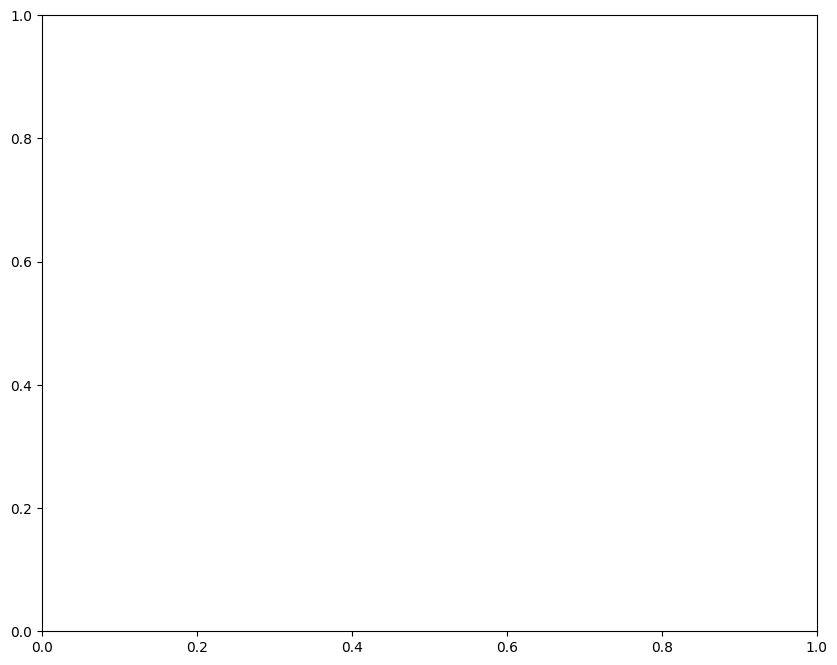

In [ ]:
dnames_familia_02, fdata_familia_02 = new_data('familiares_02.txt')

embs_familia_02, idnames_familia_02 = new_embeddings(dnames_familia_02, fdata_familia_02)

similarity_familia_02 = new_similarity(embs_familia_02, idnames_familia_02)
print(similarity_familia_02)
reductor_familia_02 = reductor_transform(reducer, fdata_familia_02)
print(reductor_familia_02)
embs_familia_02, dnames_familia_02, idnames_familia_02 = final_set(embs_familia_01, reductor_familia_02, idnames_familia_01,dnames_familia_01, dnames_familia_02)
plot_embeddings(embs_familia_02, idnames_familia_02, dnames_familia_02)

[[-6.88068643e-02 -1.20486155e-01 -1.79109033e-02  3.52311730e-02
   6.97432011e-02  6.30535632e-02  2.81189010e-02  1.44539159e-02
   1.49028301e-02 -9.39086080e-03 -3.20678391e-02  1.03257522e-02
  -6.58251904e-03 -9.94374156e-02 -2.14092154e-02]
 [-2.52202153e-05 -4.19551469e-02 -9.13028717e-02 -4.77148369e-02
   7.66446739e-02  9.47858170e-02  8.23860168e-02  5.11742271e-02
   3.62908319e-02 -9.11493227e-03 -3.81416120e-02  6.56389743e-02
   3.19129378e-02 -8.37066993e-02 -7.12861344e-02]
 [ 5.72651066e-02  5.57793640e-02  3.29946950e-02  4.36885990e-02
   4.40810248e-02  5.33317104e-02  5.45689240e-02  8.39119926e-02
   6.07659407e-02  7.71592855e-02  4.71198298e-02  2.19069645e-02
   1.90237798e-02  4.22001407e-02  5.16981110e-02]
 [-3.50221805e-02 -5.28684296e-02  6.45993650e-02  4.70551029e-02
   1.49978697e-02  7.97489882e-02  2.64087282e-02  8.23214948e-02
   5.30437678e-02 -1.91739034e-02  7.95366615e-03  4.99266759e-02
  -5.87703148e-03  2.08024066e-02  2.78685987e-03]]
[[1

ValueError: 'c' argument has 47 elements, which is inconsistent with 'x' and 'y' with size 26.

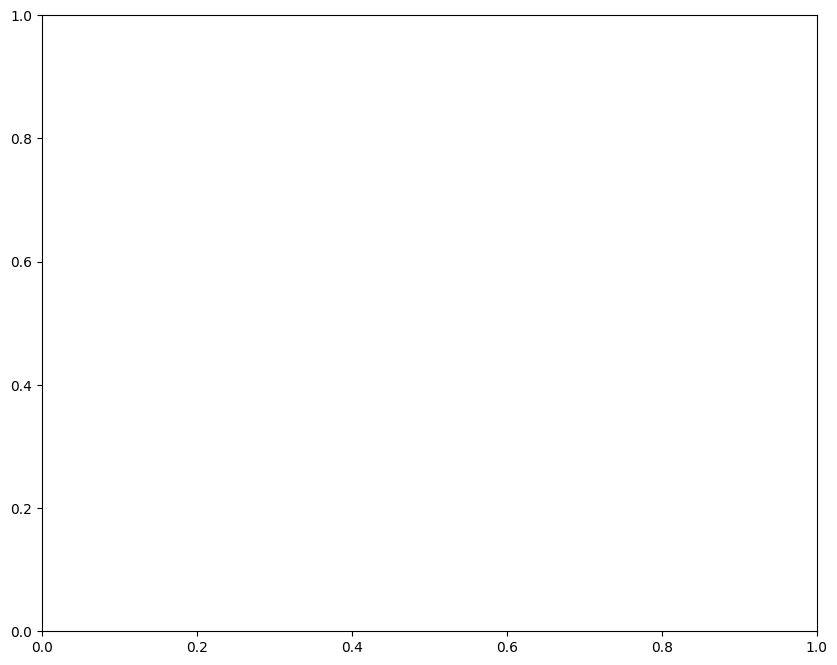

In [ ]:
dnames_familia_03, fdata_familia_03 = new_data('familiares_03.txt')

embs_familia_03, idnames_familia_03 = new_embeddings(dnames_familia_03, fdata_familia_03)

similarity_familia_03 = new_similarity(embs_familia_03, idnames_familia_03)
print(similarity_familia_03)
reductor_familia_03 = reductor_transform(reducer, fdata_familia_03)
print(reductor_familia_03)
embs_familia_03, dnames_familia_03, idnames_familia_03 = final_set(embs_familia_02, reductor_familia_03, idnames_familia_02,dnames_familia_02, dnames_familia_03)
plot_embeddings(embs_familia_03, idnames_familia_03, dnames_familia_03)

In [ ]:
image_david_1 = '/content/david_foto1.jpeg'
image_david_1_embedding = get_face_embedding(image_david_1)

FileNotFoundError: [Errno 2] No such file or directory: '/content/david_foto1.jpeg'

In [ ]:
image_david_1_emb_norm = image_david_1_embedding / np.linalg.norm(image_david_1_embedding, ord=2)
similarity_scores_david = image_david_1_emb_norm @ np.transpose(embs_norm)

In [ ]:
similarity_scores_david

In [ ]:
idx_sort_david_1 =  np.argsort(-similarity_scores_david)
idx_sort_david_1

In [ ]:
for i in idx_sort:
    person_name = fdata[i]['name']
    similarity = similarity_scores_david[i]
    print("Name: {}, Similarity: {:.4f}".format(person_name, similarity))

In [ ]:
# calcular reductor
david_emb_reducer = reducer.transform(image_david_1_embedding.reshape(1, -1))
all_embeddings_reducer = np.vstack((embeddings, david_emb_reducer))

# agregar david como una id extra
if 'david' not in dnames:
    dnames['david'] = len(dnames)
all_idnames = idnames + [dnames['david']]


plt.figure(figsize=(10, 8))
colors = ['red', 'yellow', 'green', 'black', 'lightblue', 'lightgreen', 'blue', 'purple']
plt.scatter(all_embeddings_reducer[:, 0], all_embeddings_reducer[:, 1], c = all_idnames, cmap=matplotlib.colors.ListedColormap(colors))

unique_names = list(dnames.keys())
for i, txt in enumerate(all_idnames):
    plt.annotate(unique_names[txt], (all_embeddings_reducer[i, 0], all_embeddings_reducer[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

# Ahora revisamos consistencia en los resultados

In [ ]:
# mi foto anterior sera la ultima id nueva (15)
embs_norm_with_david = np.vstack((embs_norm, image_david_1_emb_norm))
embs_norm_with_david.shape

In [ ]:
image_david_2_embedding = get_face_embedding('/content/david_foto2.png')
image_david_2_emb_norm = image_david_2_embedding / np.linalg.norm(image_david_2_embedding, ord=2)

In [ ]:
# calcular similarity de la segunda imagen 'david' comparada con todas las anteriores
similarity_scores_david_2 = image_david_2_emb_norm @ np.transpose(embs_norm_with_david)
# calculamos las ids de los resultados
idx_sort_david_2 = np.argsort(-similarity_scores_david_2)

In [ ]:
similarity_scores_david_2

In [ ]:
idx_sort_david_2

In [ ]:
for i in idx_sort_david_2:
    similarity = similarity_scores_david_2[i]
    print("Name: {}, Similarity: {:.4f}".format(i, similarity))

# Tener más de una persona en foto (?)


In [ ]:
# Function to get embeddings of all faces in an image
def get_all_face_embeddings(image_path):
    """Extract face embeddings from all faces in an image"""
    img = PIL.Image.open(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")
    img = np.array(img)
    if img.shape[2] == 4:
      img = img[:,:,:-1]

    faces = app.get(img)
    if len(faces) < 1:
        print("No faces detected in the image")
        return []

    # Return embeddings for all detected faces
    return [face.embedding for face in faces]

In [ ]:
# Get embeddings for all faces in imagen_familia.jpg
family_image_path = '/content/imagen_familia.jpg'
family_face_embeddings = get_all_face_embeddings(family_image_path)

print(f"Detected {len(family_face_embeddings)} faces in {family_image_path}")

In [ ]:
print(len(family_face_embeddings),len(family_face_embeddings[0]))

In [ ]:
import matplotlib.patches as patches
def plot_faces_with_bboxes(image_path):
    img = PIL.Image.open(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")
    img_np = np.array(img)
    if img_np.shape[2] == 4:
      img_np = img_np[:,:,:-1]

    faces = app.get(img_np)
    fig, ax = plt.subplots(1)
    ax.imshow(img_np)

    if len(faces) < 1:
        print("No faces detected in the image")
        plt.show()
        return

    for i, face in enumerate(faces):
        # bounding box coordinates
        bbox = face.bbox.astype(int)
        x, y, w, h = bbox[0], bbox[1], bbox[2]-bbox[0], bbox[3]-bbox[1]

        # rectangle patch
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # index label
        plt.text(x, y - 10, str(i), color='red', fontsize=12, weight='bold')
    plt.show()

# plot the family image with bounding boxes
plot_faces_with_bboxes(family_image_path)

In [ ]:
# normalize the family face embeddings
family_face_embeddings_norm = np.array([emb / np.linalg.norm(emb, ord=2) for emb in family_face_embeddings])

# reshape image_david_1_emb_norm to be a column vector for matrix multiplication
similarity_scores_family_david1 = family_face_embeddings_norm @ image_david_1_emb_norm.reshape(-1, 1)
print(similarity_scores_family_david1)